# 毕业论文`GRAD`
## `MCIP`气象场分析

---
*@author: Evan*\
*@date: 2023-12-19*

In [1]:
import numpy as np
import os

import sys
sys.path.append('../../../src/')
from namelist import *
from mask import average_data
from spatial import plot_PRD_map, plot_PRD_diff

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'QV'
years = np.array([2022,2021,2019]) # 此处年份倒置是为了方便后续创建dataarray时取用时间维度

summer_files = [os.path.join(processed_dir, f"Jul_{year}/Jul_{year}_mcip.nc") for year in years]
autumn_files = [os.path.join(processed_dir, f"Sep_{year}/Sep_{year}_mcip.nc") for year in years]

avg_summer    = average_data(summer_files, var) * 1000
avg_autumn    = average_data(autumn_files, var) * 1000
avg_summer_uw = average_data(summer_files, 'uwind')
avg_autumn_uw = average_data(autumn_files, 'uwind')
avg_summer_vw = average_data(summer_files, 'vwind')
avg_autumn_vw = average_data(autumn_files, 'vwind')

In [3]:
summer_hours = avg_summer['time'].dt.hour
autumn_hours = avg_autumn['time'].dt.hour
daytime_summer = (summer_hours >= 8) & (summer_hours <= 17)
nighttime_summer = (summer_hours < 8) | (summer_hours >= 18)
daytime_autumn = (autumn_hours >= 8) & (autumn_hours <= 17)
nighttime_autumn = (autumn_hours < 8) | (autumn_hours >= 18)

day_summer   = avg_summer.sel(time = daytime_summer).mean(dim='time')
day_autumn   = avg_autumn.sel(time = daytime_autumn).mean(dim='time')
night_summer = avg_summer.sel(time = nighttime_summer).mean(dim='time')
night_autumn = avg_autumn.sel(time = nighttime_autumn).mean(dim='time')

uw_day_summer   = avg_summer_uw.sel(time = daytime_summer).mean(dim='time')
uw_day_autumn   = avg_autumn_uw.sel(time = daytime_autumn).mean(dim='time')
uw_night_summer = avg_summer_uw.sel(time = nighttime_summer).mean(dim='time')
uw_night_autumn = avg_autumn_uw.sel(time = nighttime_autumn).mean(dim='time')

vw_day_summer   = avg_summer_vw.sel(time = daytime_summer).mean(dim='time')
vw_day_autumn   = avg_autumn_vw.sel(time = daytime_autumn).mean(dim='time')
vw_night_summer = avg_summer_vw.sel(time = nighttime_summer).mean(dim='time')
vw_night_autumn = avg_autumn_vw.sel(time = nighttime_autumn).mean(dim='time')

QV_day_summer


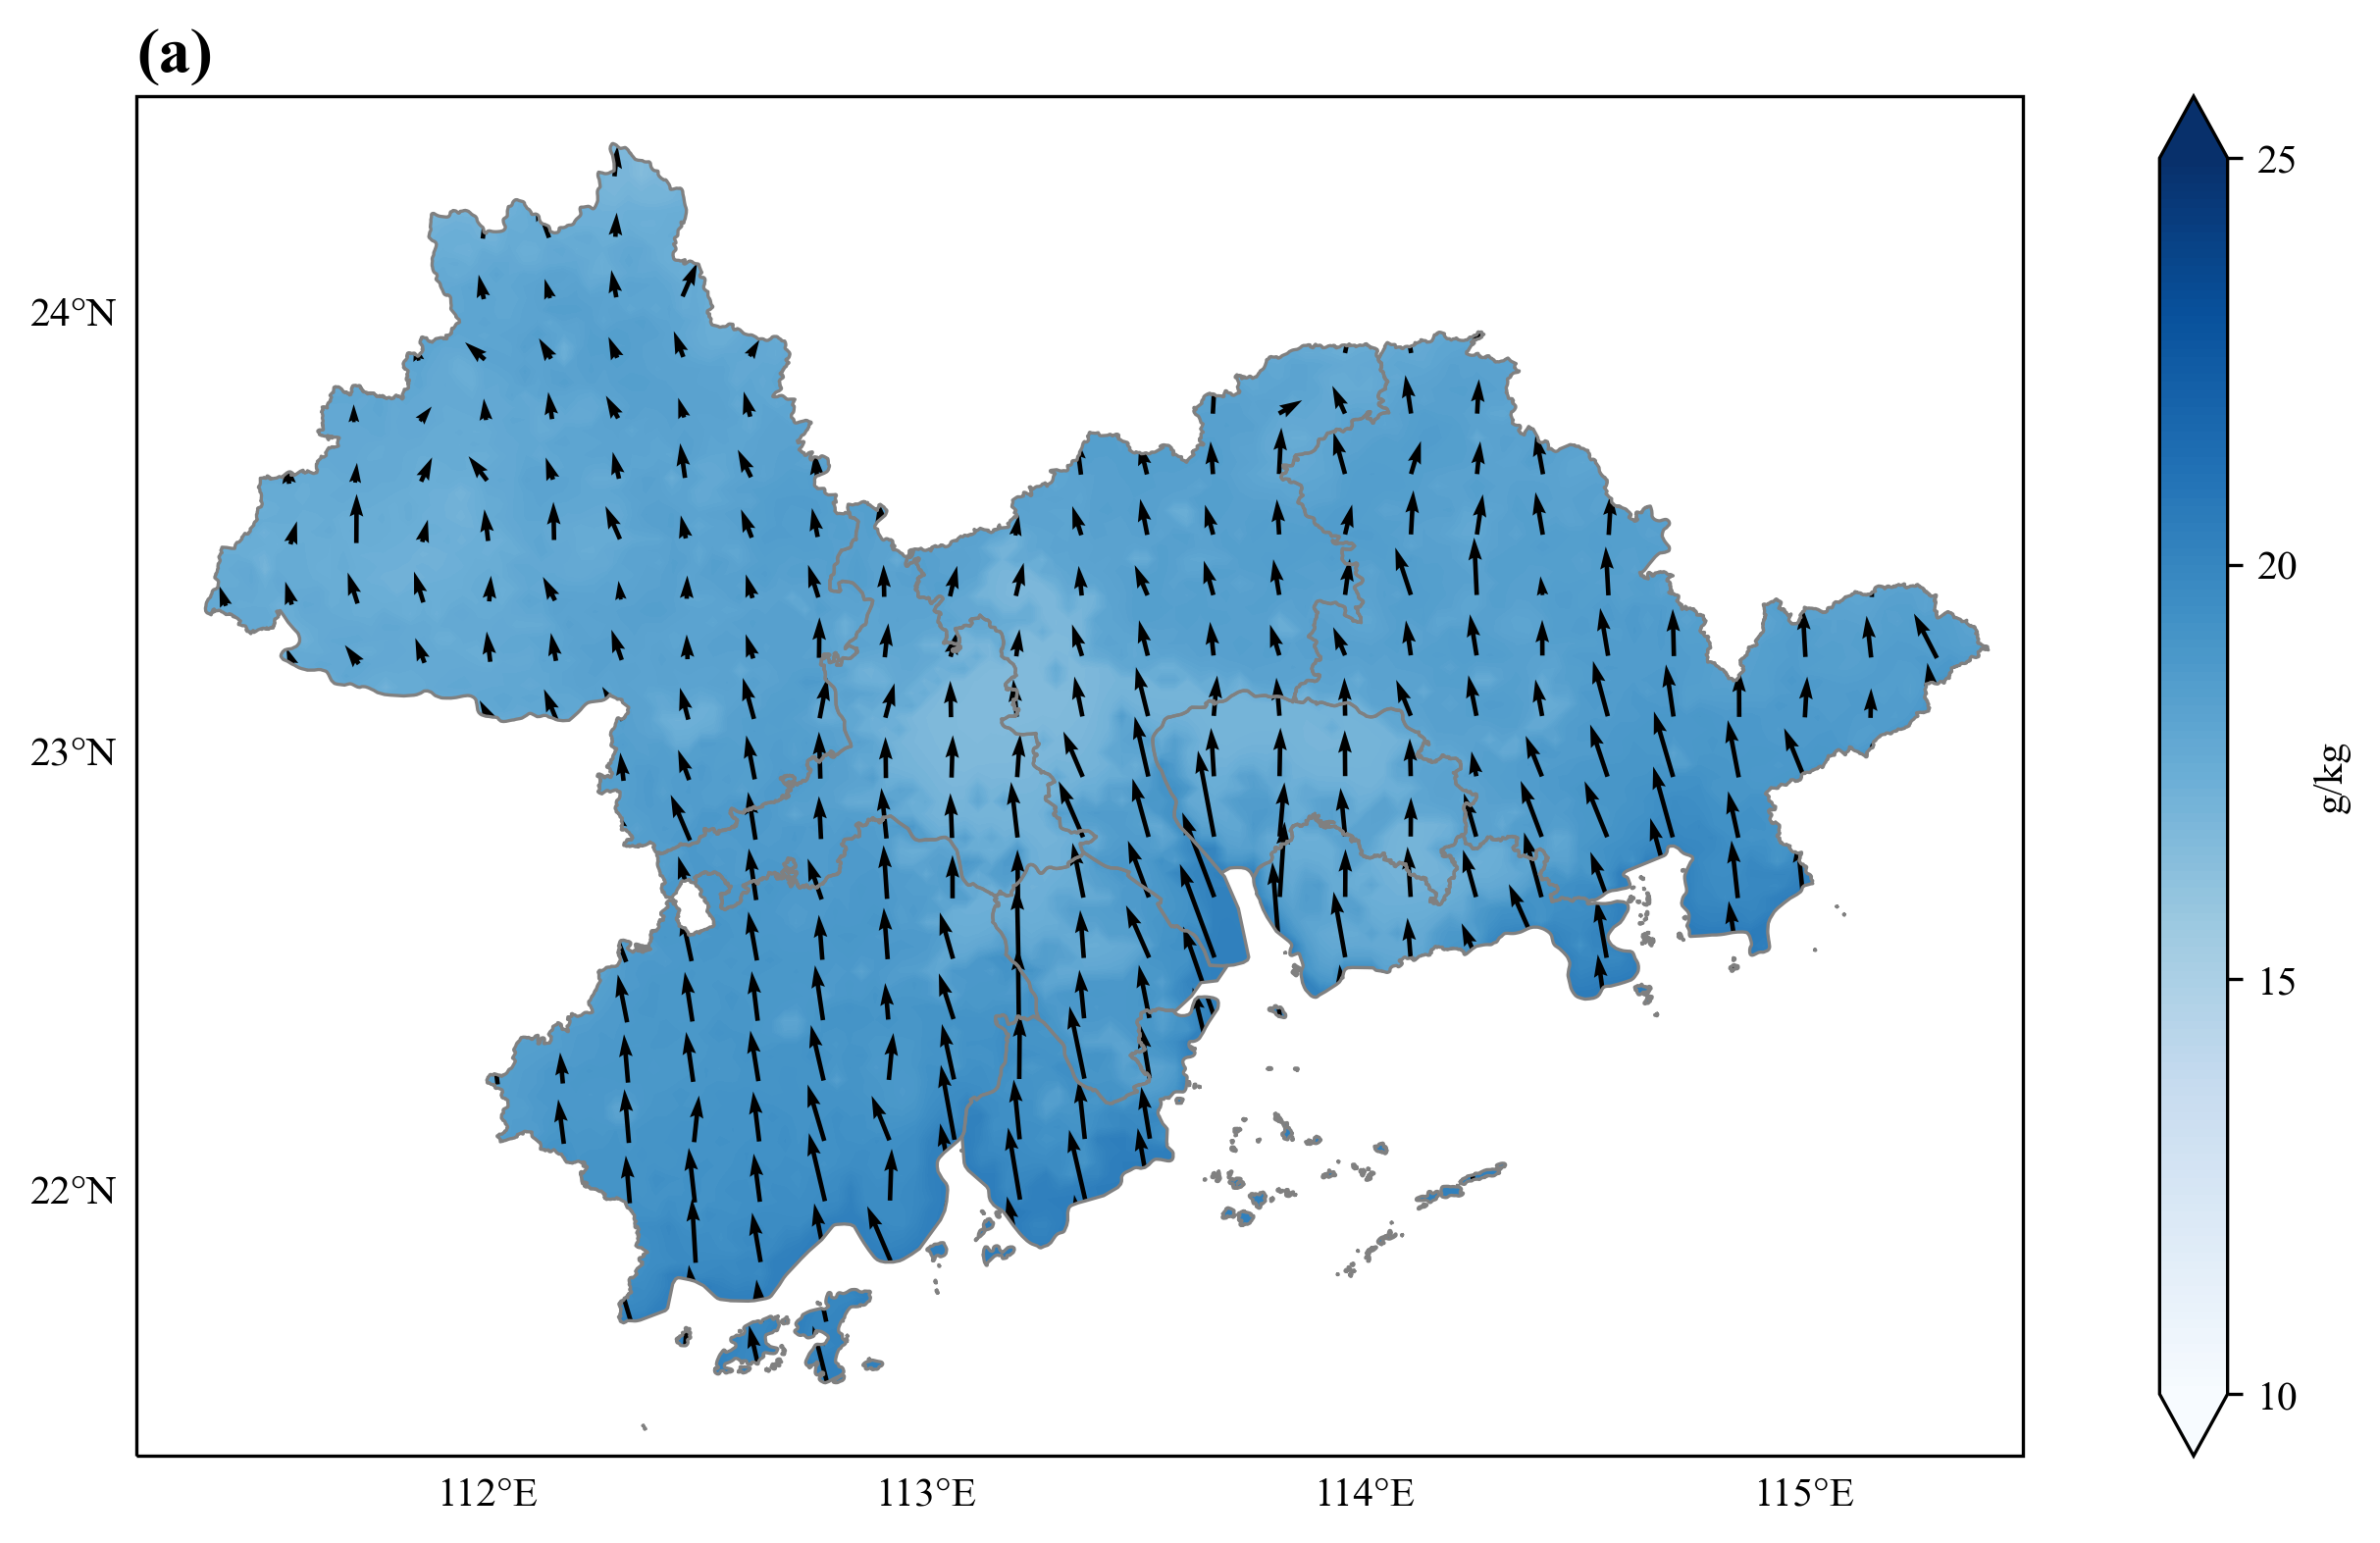

QV_night_summer


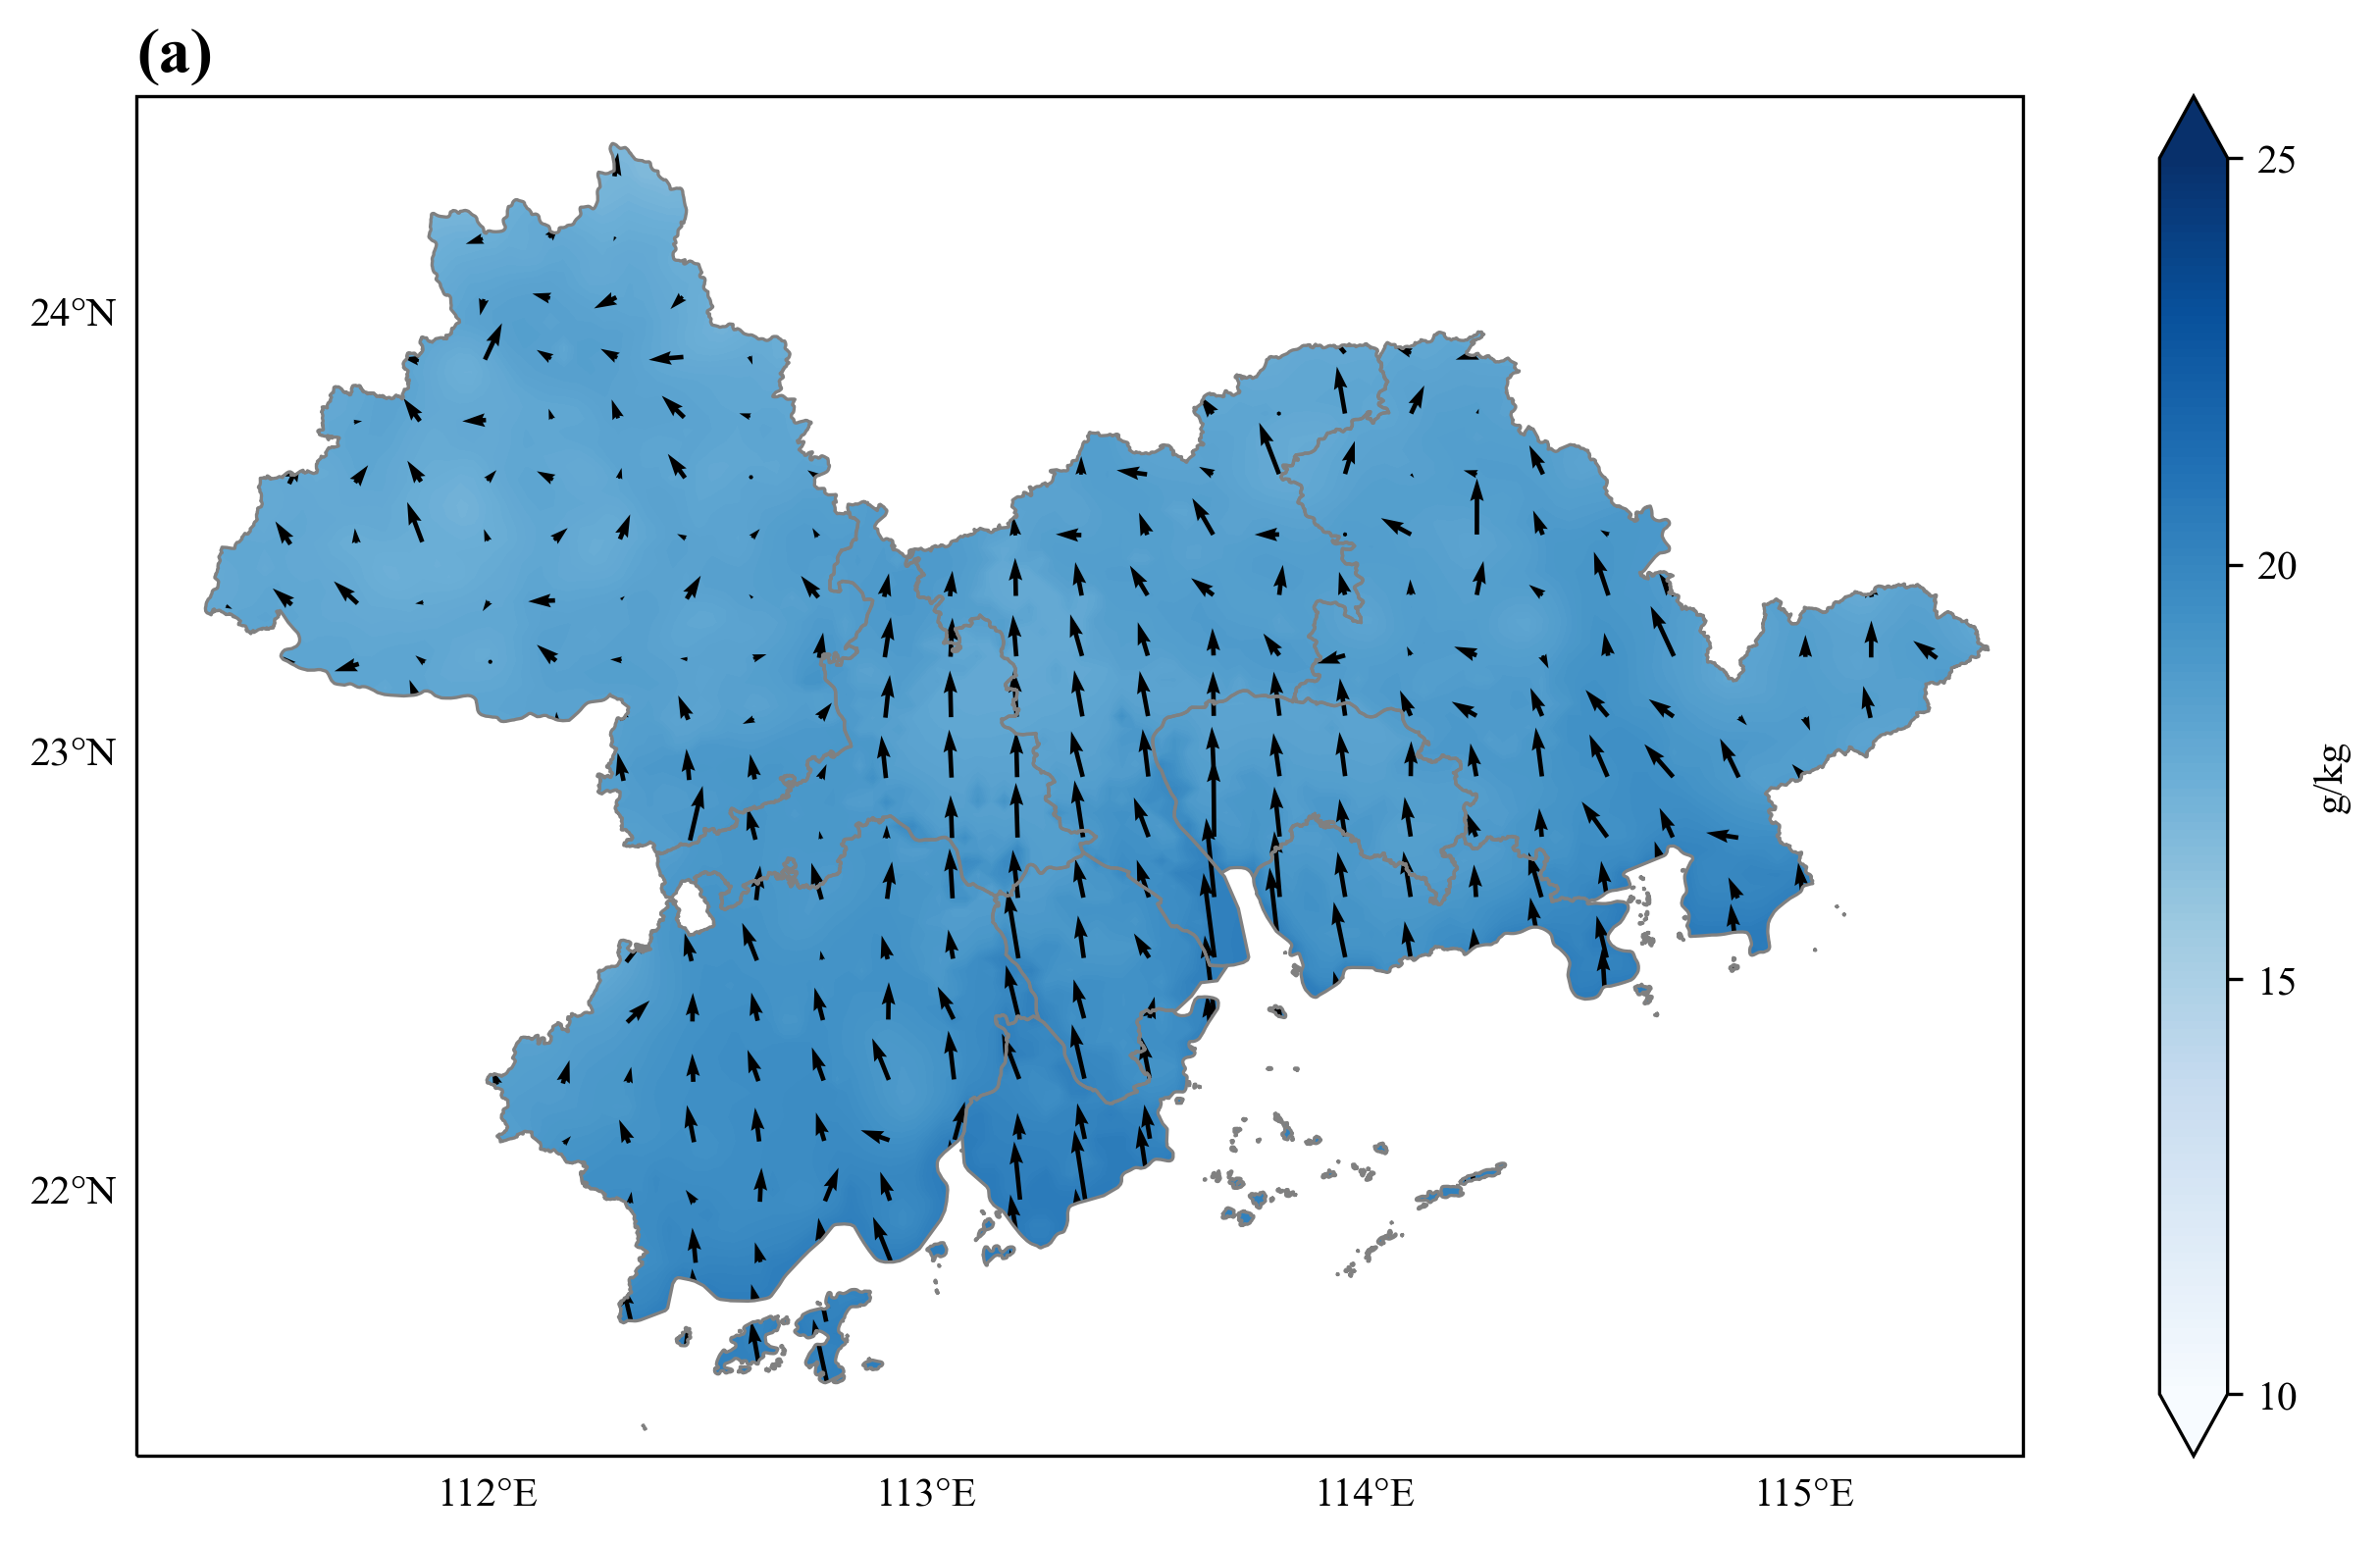

QV_day_autumn


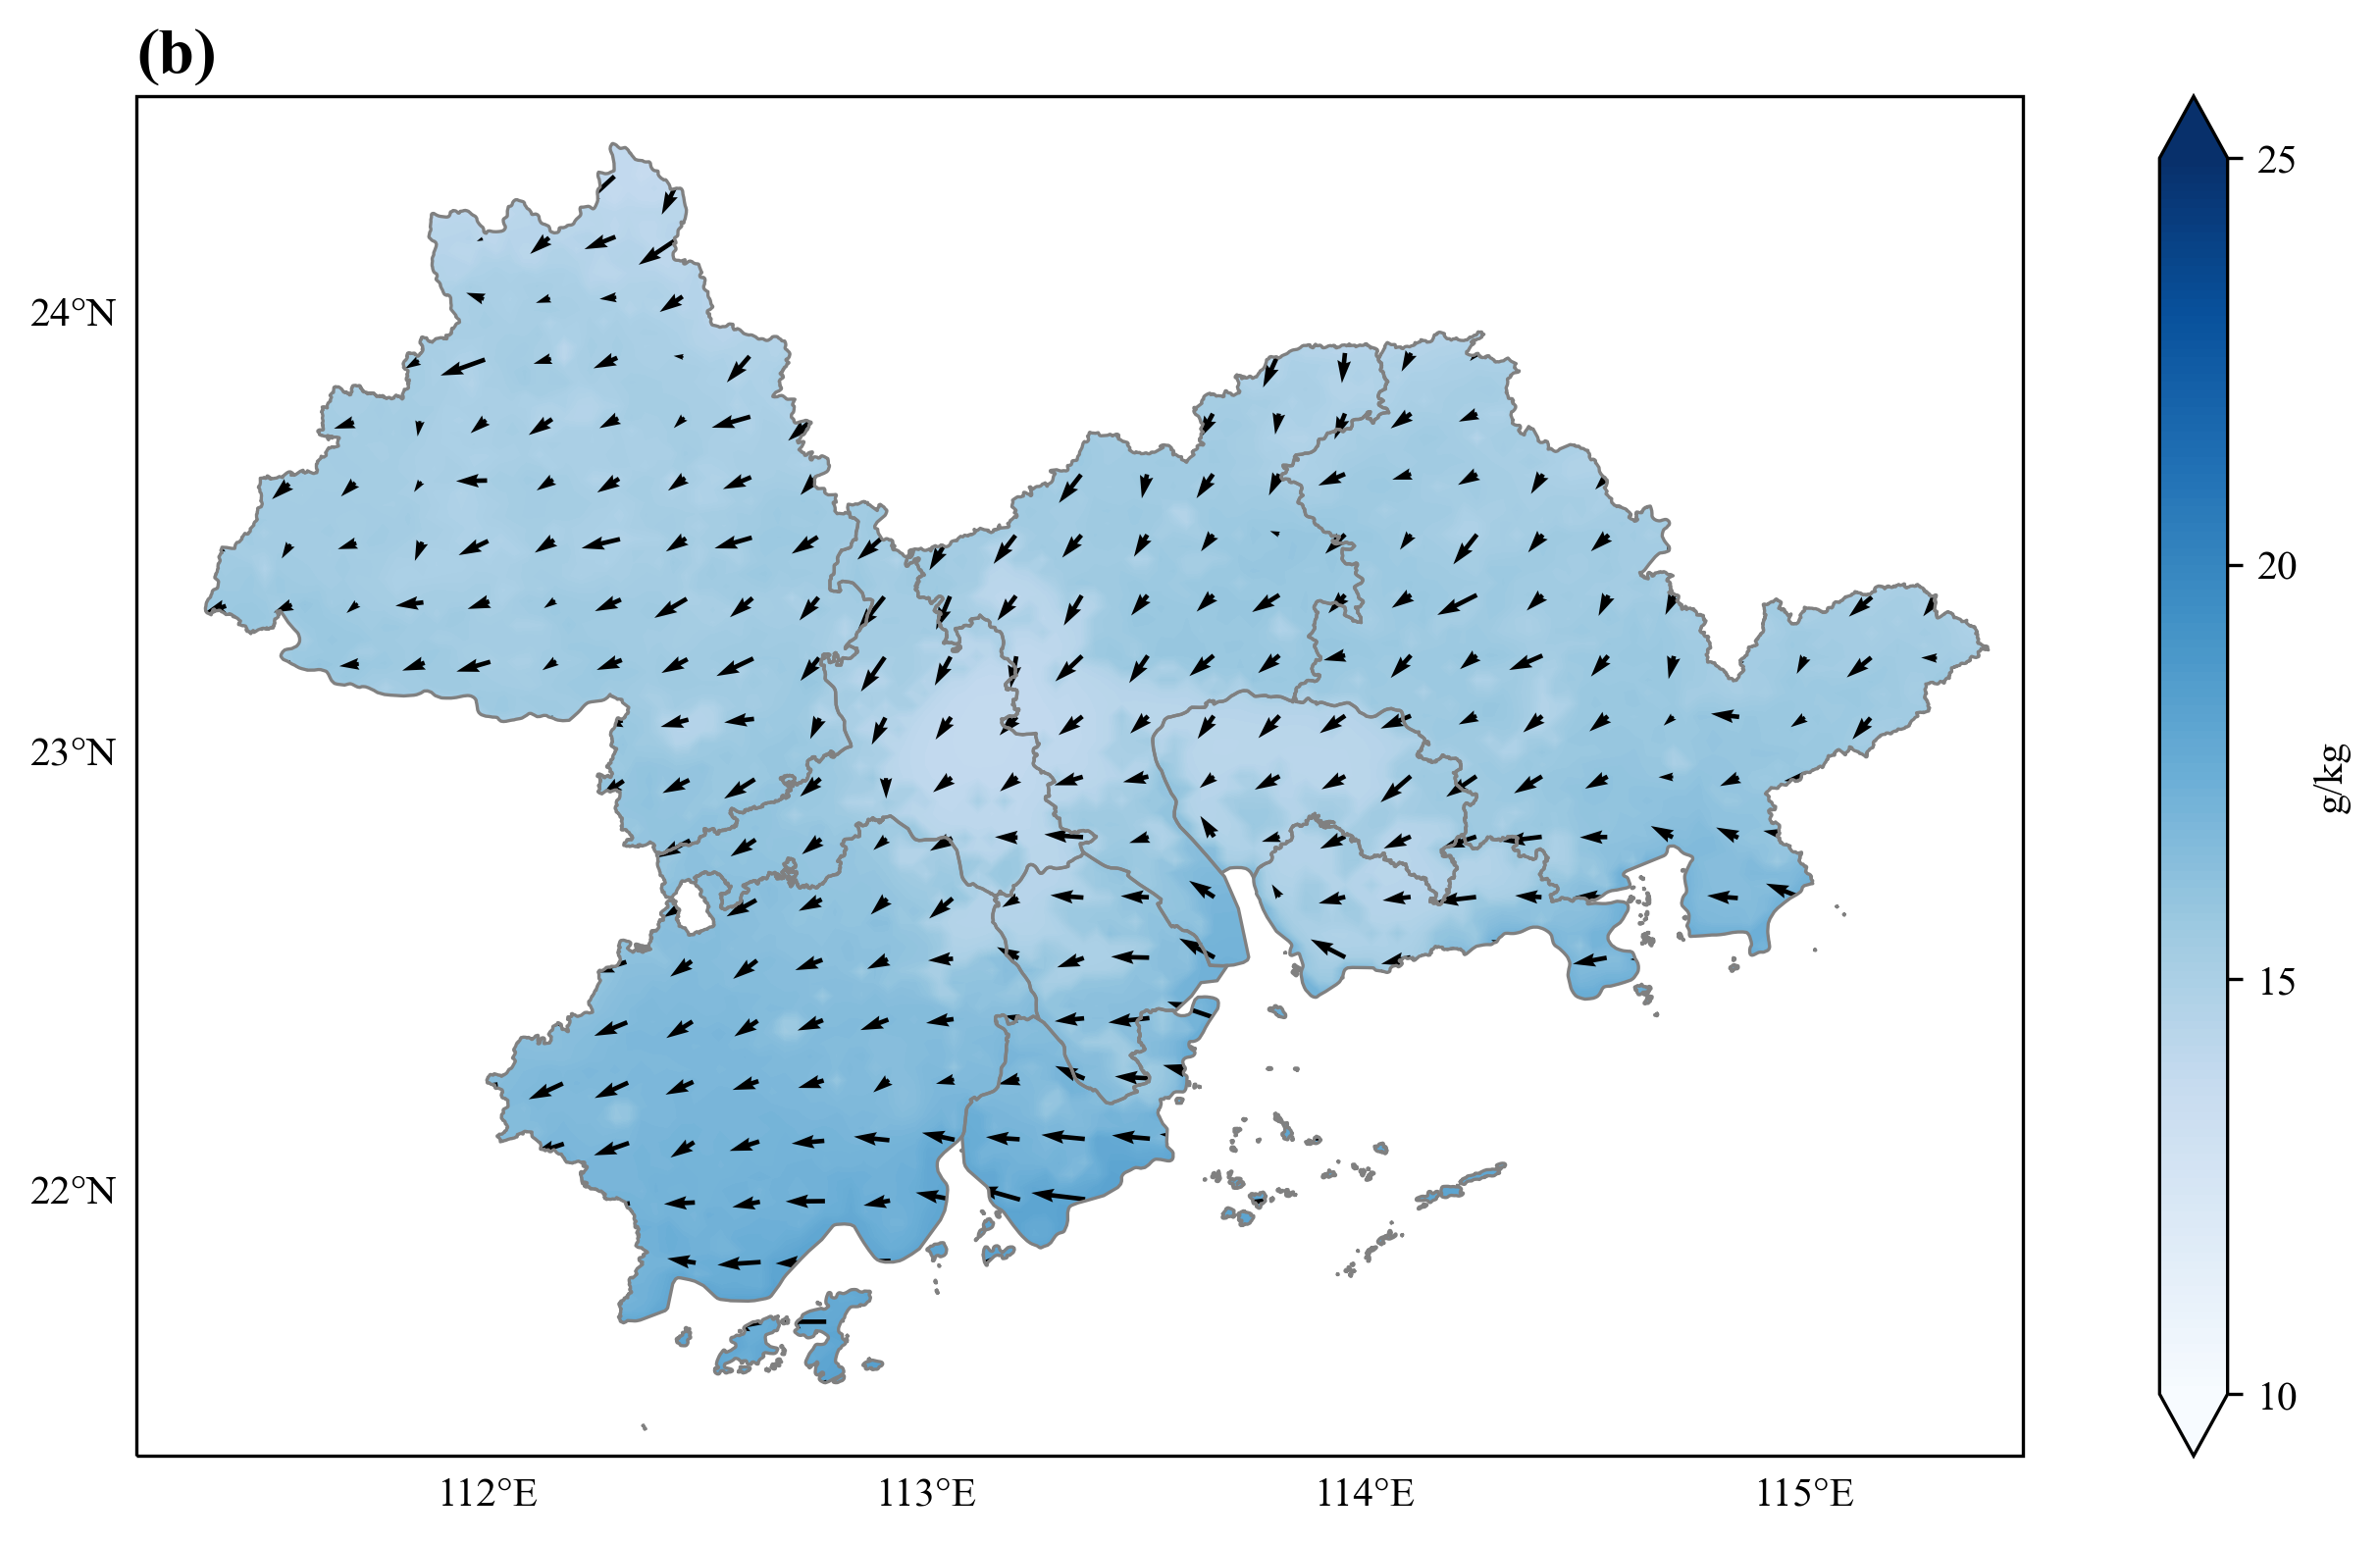

QV_night_autumn


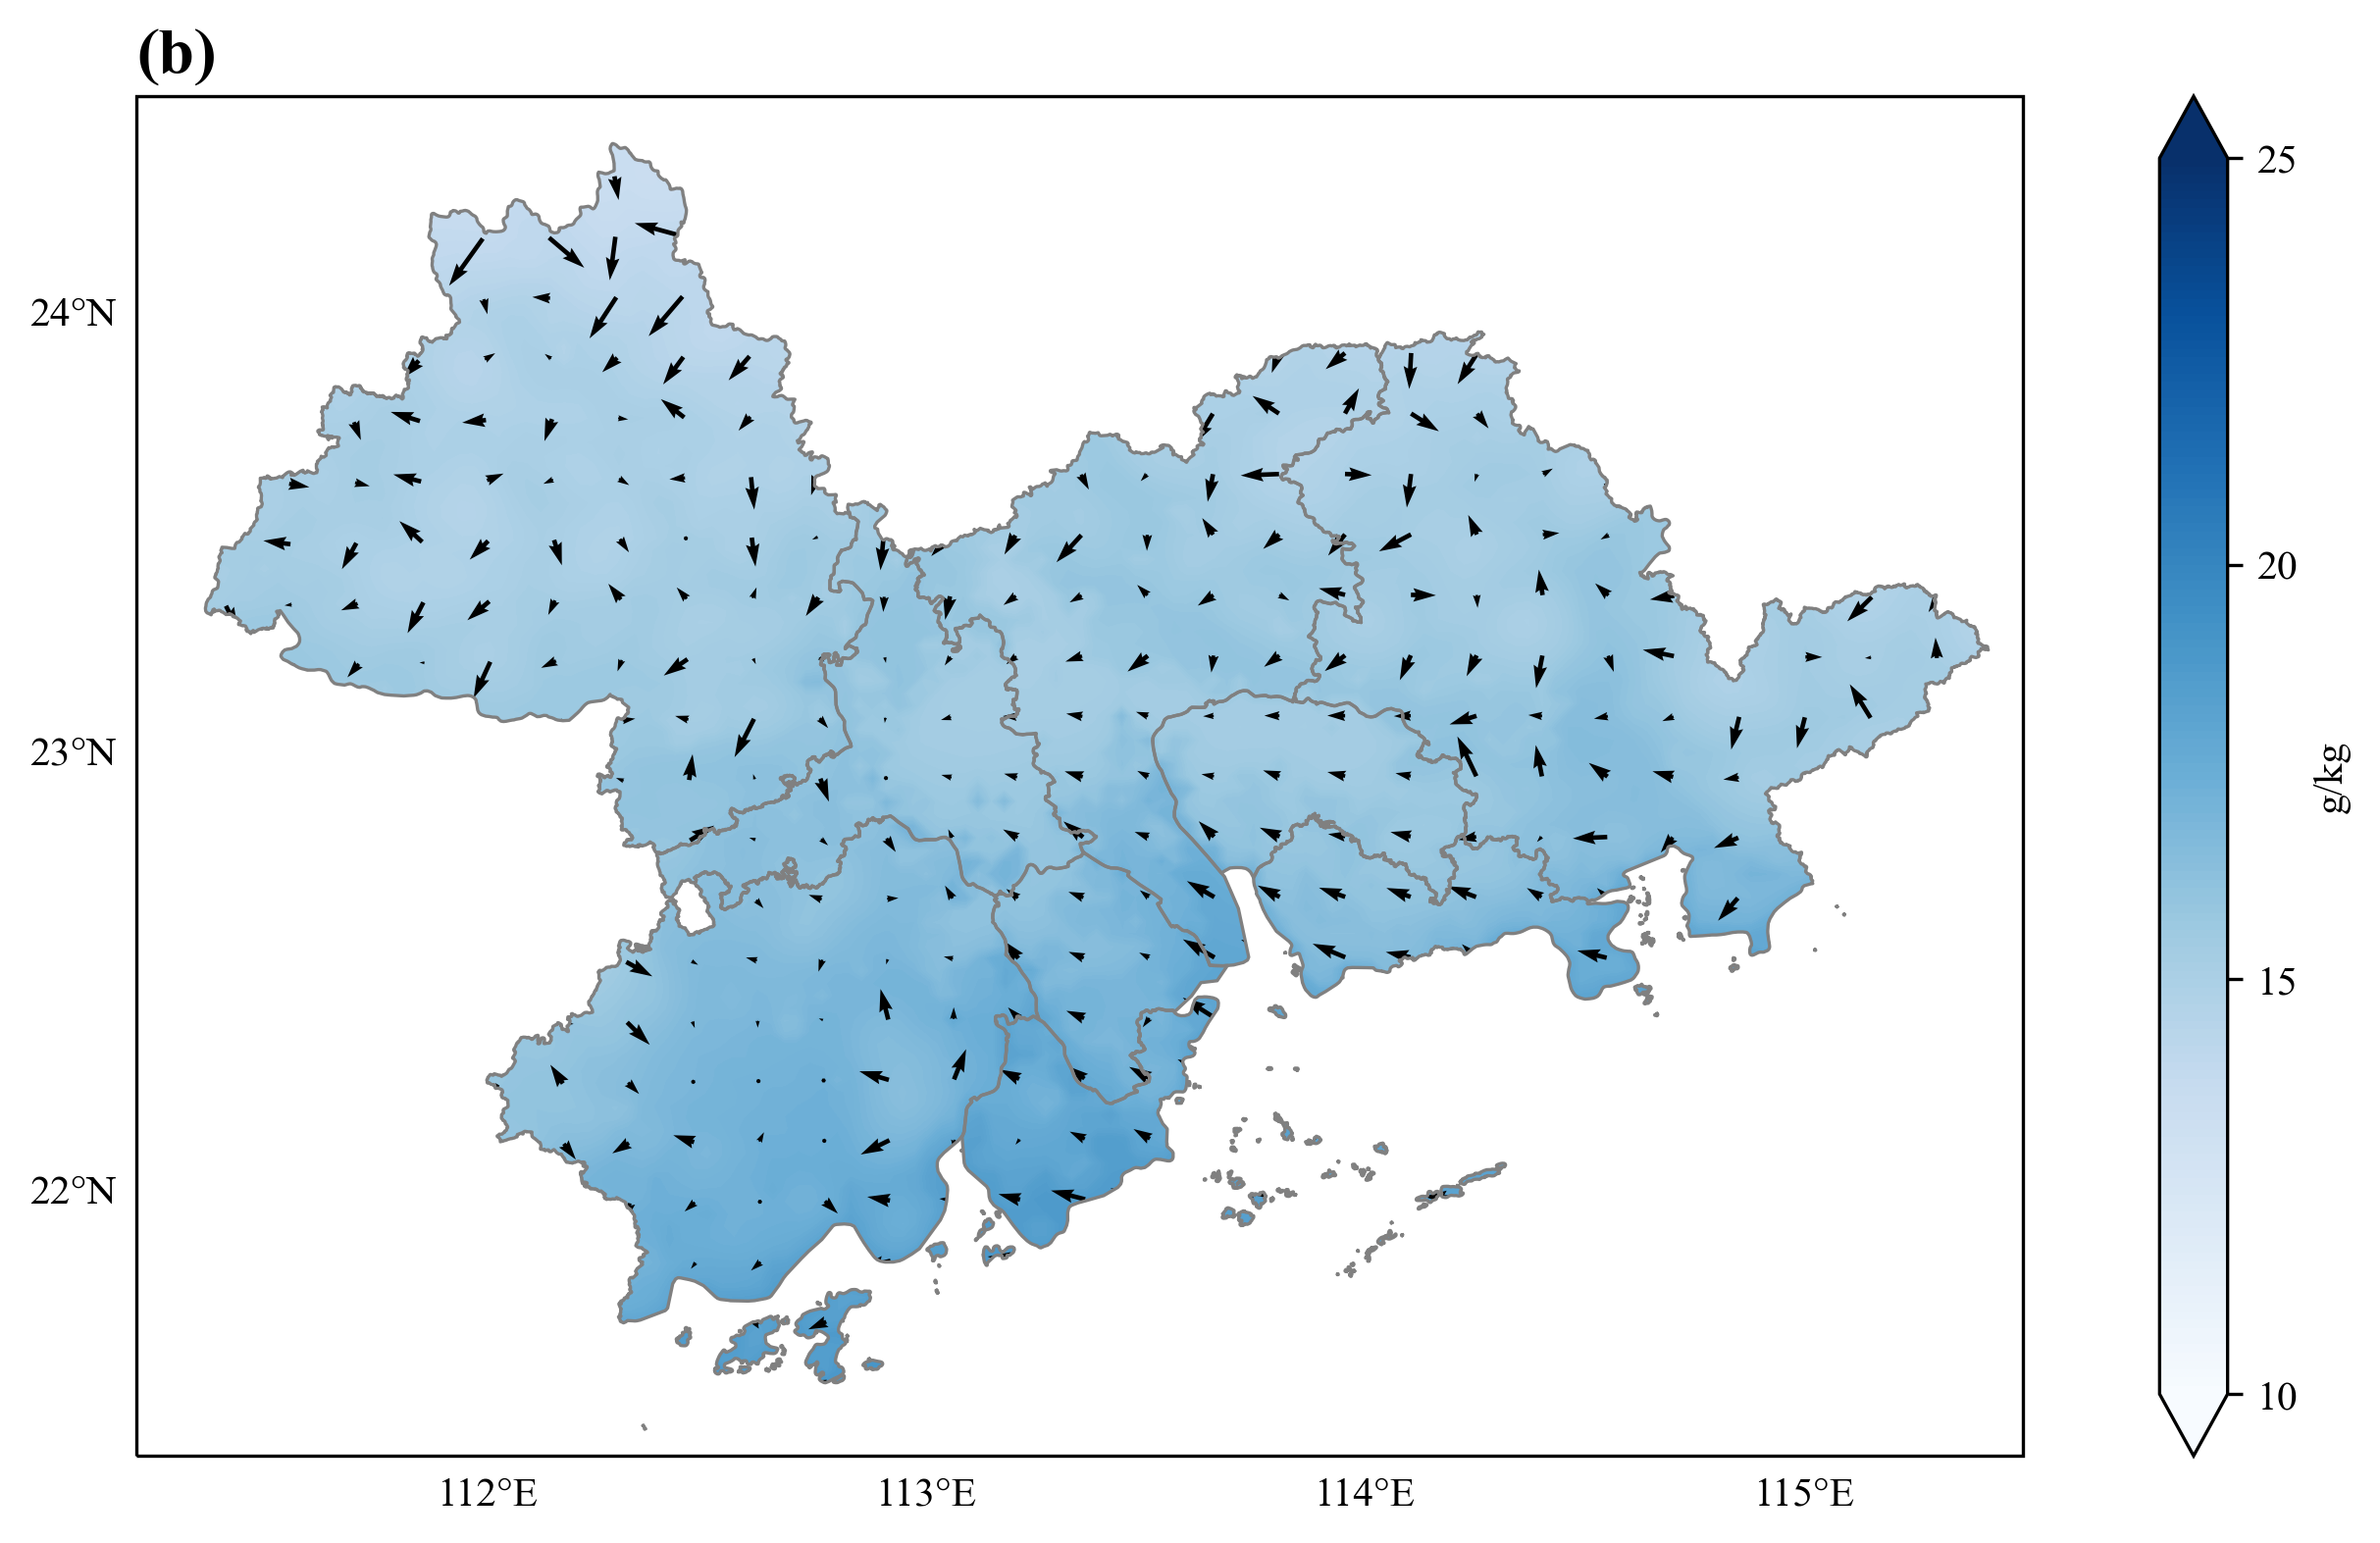

QV_day_diff


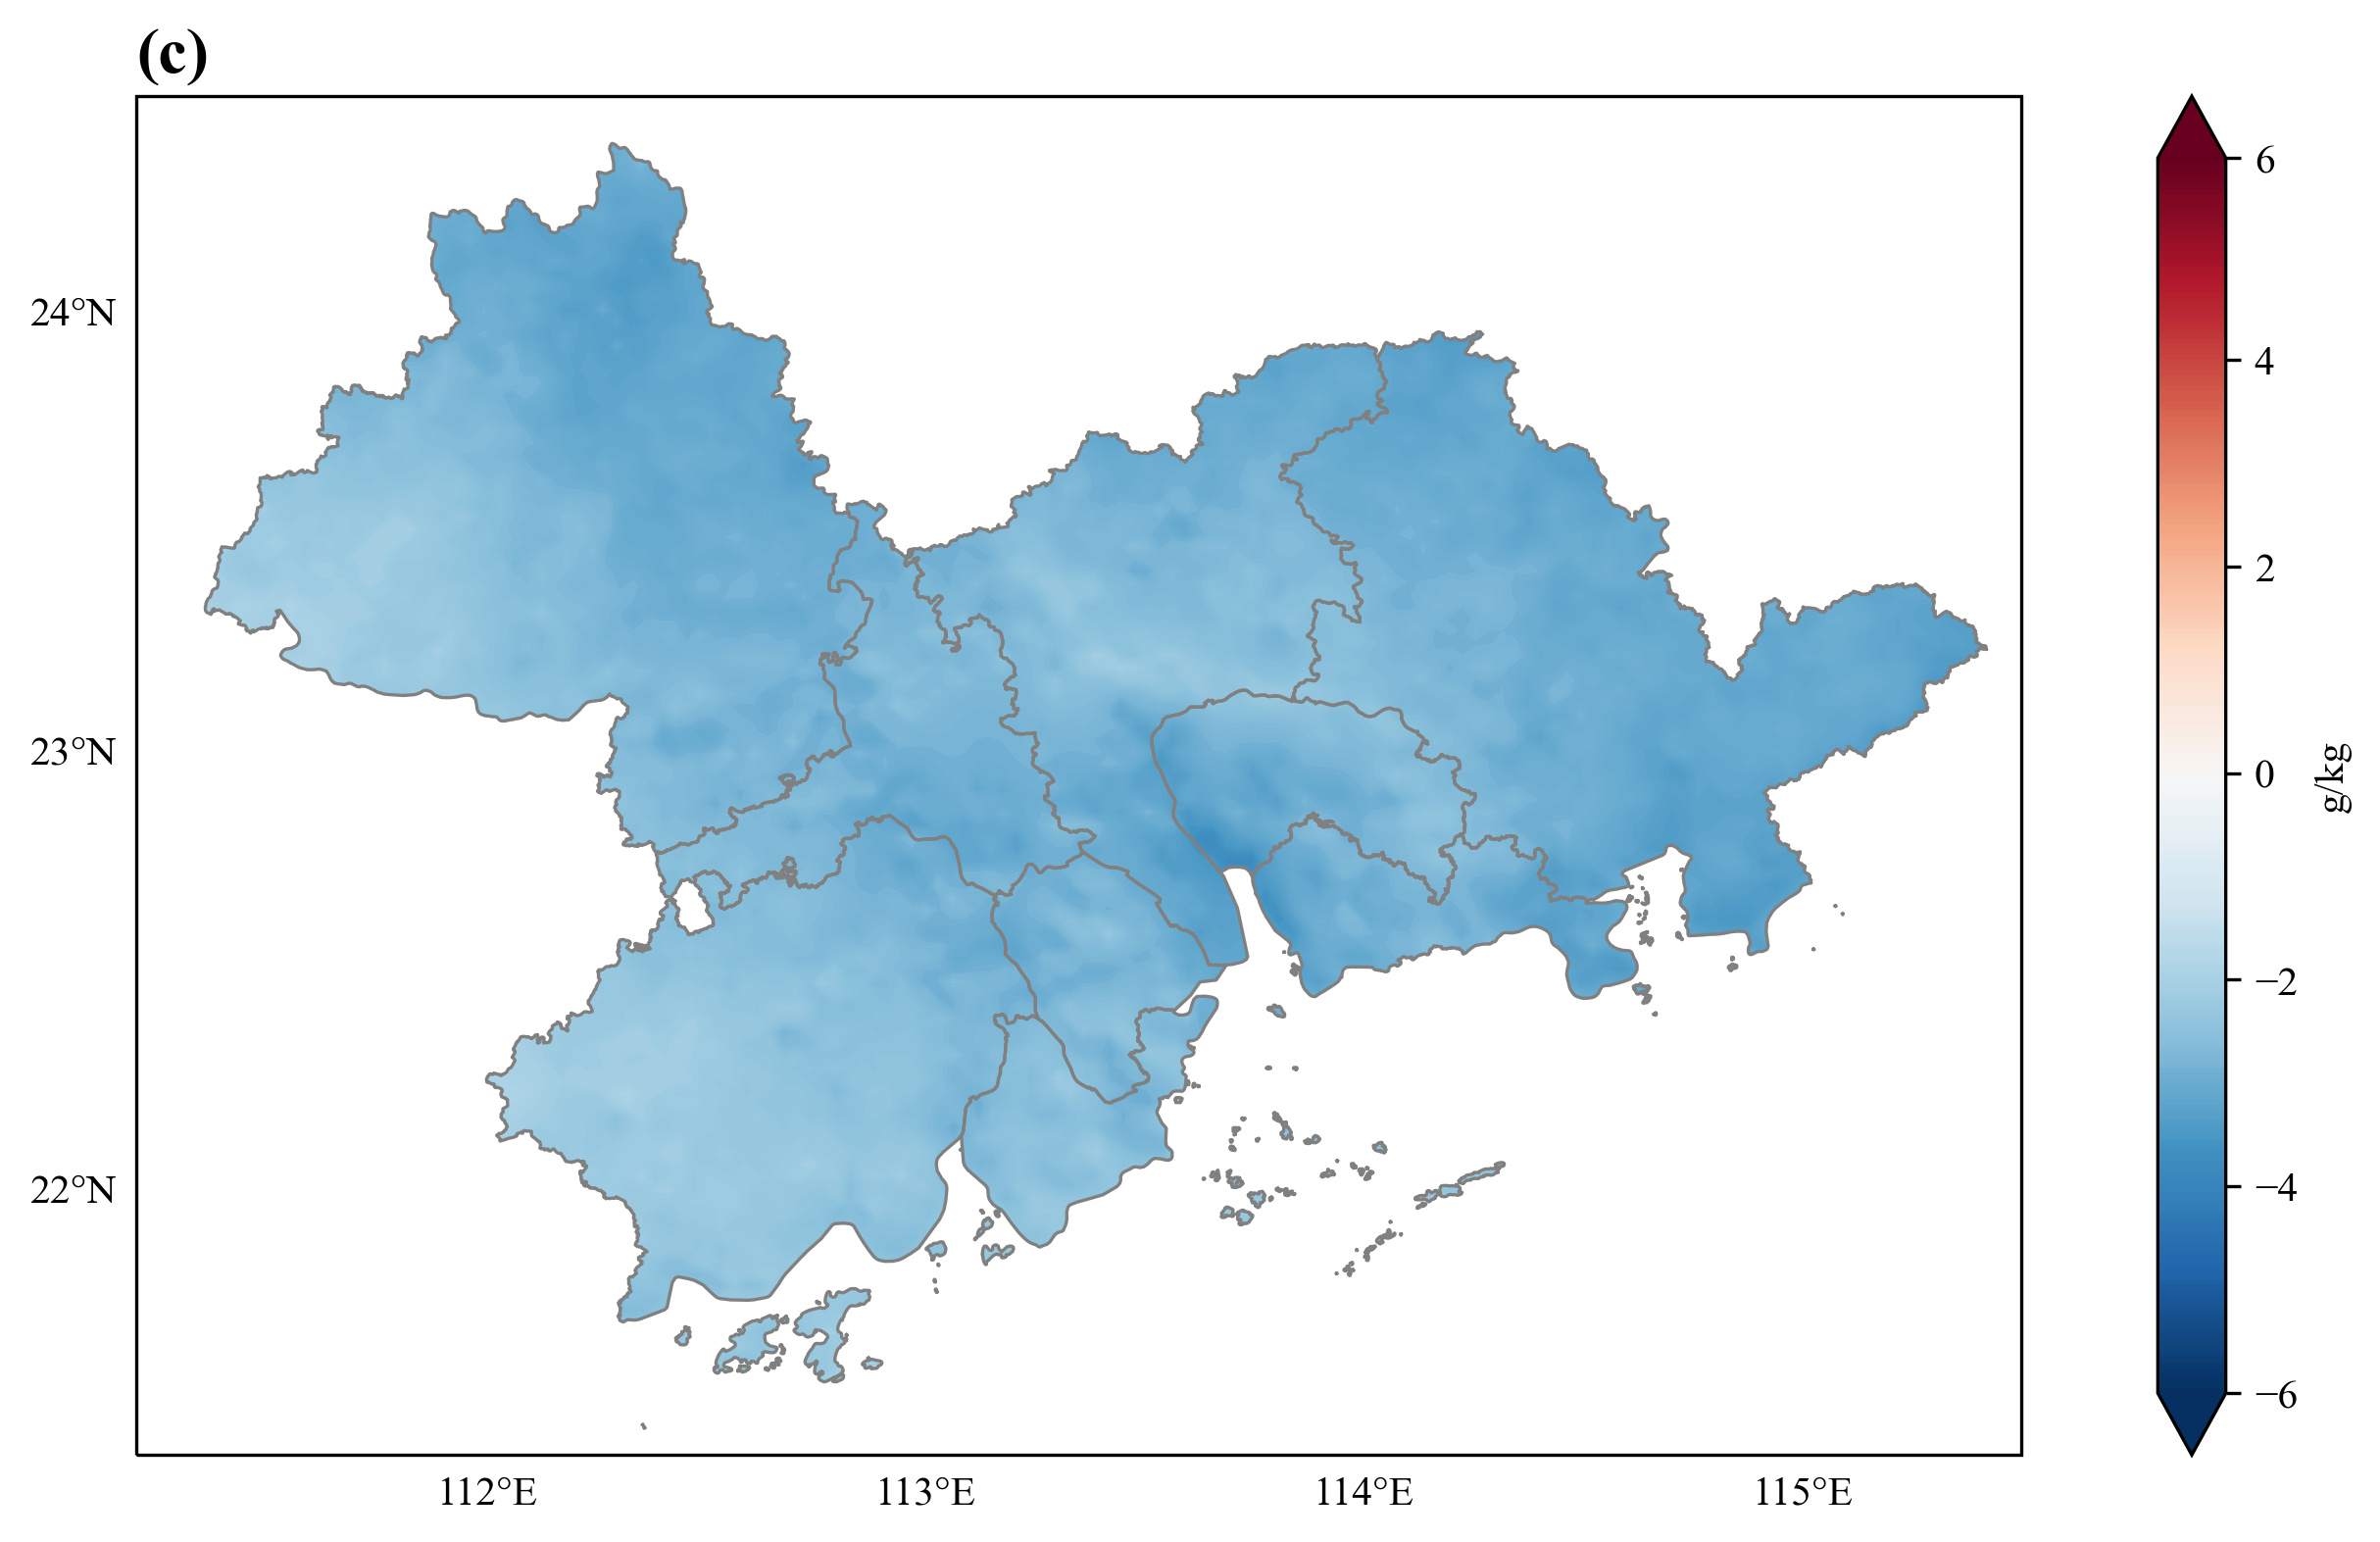

QV_night_diff


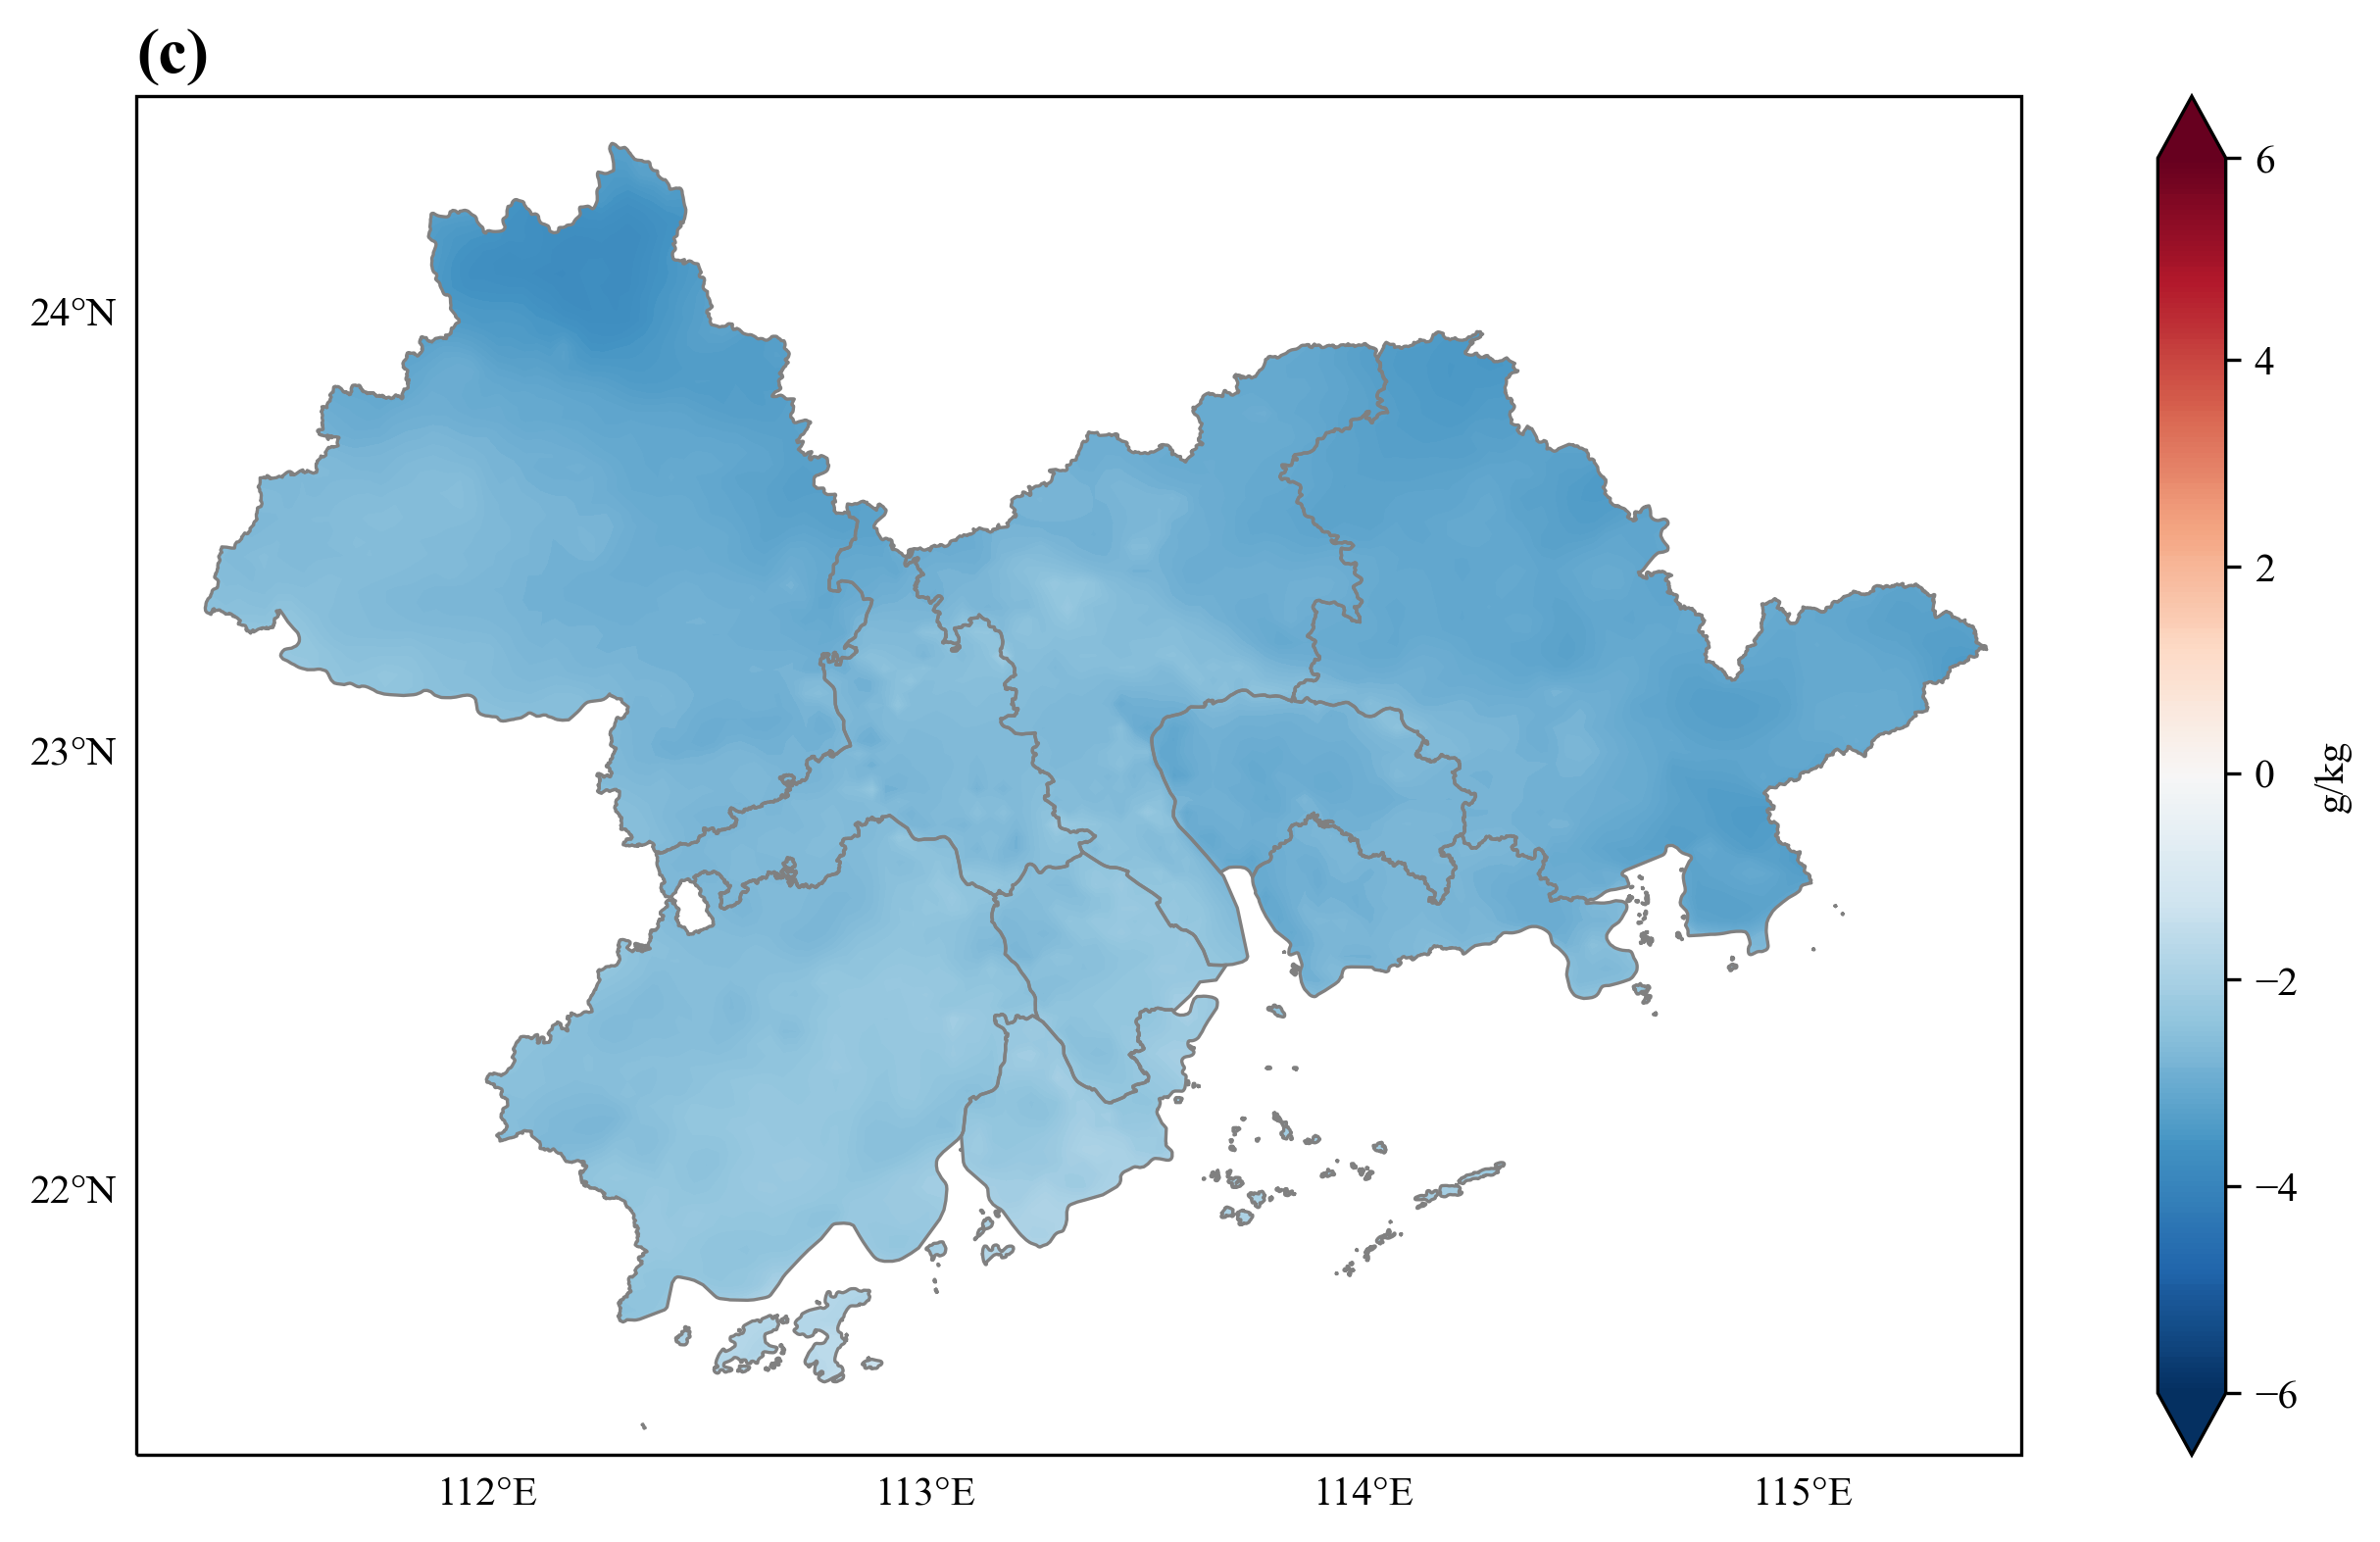

In [4]:
groups = ['summer','autumn','diff']
periods = ['day','night']
outpath = progdir + 'Seasonally/figures/气象场平均态/Ground/Spatial_dn/'

for group in groups:
    for period in periods:
        print(f'{var}_{period}_{group}')
        if group is not 'diff':
            
            cmin   = 10 if period == 'day' else 10
            cmax   = 25 if period == 'day' else 25
            cmstep = 0.1 if period == 'day' else 0.1
            cbstep = 5 if period   == 'day' else 5
            title  = '(a)' if group == 'summer' else '(b)'
            
            data_to_plot = eval(f'{period}_{group}')
            uwind_to_plot = eval(f'uw_{period}_{group}')
            vwind_to_plot = eval(f'vw_{period}_{group}')
            
            plot_PRD_map(avg_summer, cmin, cmax, cmstep, cbstep,
                        data_to_plot, uwind_to_plot, vwind_to_plot,
                        ngrid=5, scale=100, headwidth=3,
                        mapcolor='Blues',title=title, colorbar_label='g/kg',
                        outpath=outpath+f'{var}_{period}_{group}.png')
        else:            
            cmin   = -6 if period == 'day' else -6
            cmax   = 6 if period == 'day' else 6
            cmstep = 0.05 if period == 'day' else 0.05
            cbstep = 2 if period == 'day' else 2

            data1_to_plot = eval(f'{period}_summer')
            data2_to_plot = eval(f'{period}_autumn')
            
            plot_PRD_diff(avg_summer, cmin, cmax, cmstep, cbstep,
                          data1_to_plot, data2_to_plot,
                        title='(c)', colorbar_label='g/kg',
                        outpath=outpath+f'{var}_{period}_{group}.png')